In [7]:
library(survival)
library(ggplot2)
#help(clogit)

In [8]:
dir_fig = 'R_clogit/for_publish/'

In [9]:
file_main <- 'main_df_toR_ZS_PB_len25_supp2.csv'
df_main <- read.table(file_main, header = TRUE, sep = ",")
df_main[,'Platform'] <- as.factor(df_main[,'Platform'])
df_main[,'sex'] <- as.factor(df_main[,'sex'])
print('dimention all:')
print(dim(df_main))
#df_main

# if you want to only consider one platform
df_main = df_main[df_main$Platform=='PB',]
print('dimention platform only:')
print(dim(df_main))
#df_main

[1] "dimention all:"
[1] 243 504
[1] "dimention platform only:"
[1] 142 504


In [10]:
### Clean features
fts = c('FDR_ASD_cds', 'FDR_DD_cds', 'FDR_NDD_cds', 
        'PLIp9_DEV_BR_GENE_10_cds', 
        'DEV_BR_GENE_10_cds', 
        'PLIp9_cds', 
        'LOWPLI_cds',
        'FDR_ASD_utr', 'FDR_DD_utr', 'FDR_NDD_utr', 
        'PLIp9_DEV_BR_GENE_10_utr',
        'DEV_BR_GENE_10_utr', 
        'PLIp9_utr', 
        'LOWPLI_utr',
        'FDR_ASD_intron', 'FDR_DD_intron', 'FDR_NDD_intron', 
        'PLIp9_DEV_BR_GENE_10_intron',
        'DEV_BR_GENE_10_intron', 
        'PLIp9_intron', 
        'LOWPLI_intron',
        'FB_PR', 'FB_ENH', 'GNOCCHI_4', 'GNOCCHI_3', 'GNOCCHI_2')
fts_labels = c('ASD FDR, CDS', 'DD FDR, CDS', 'NDD FDR, CDS', 
               'dev. brain pLI≥.9 genes, CDS', 
               'dev. brain genes, CDS', 
               'pLI≥.9, CDS', 
               'pLI≤.9, CDS',
               'ASD FDR, UTR', 'DD FDR, UTR', 'NDD FDR, UTR', 
               'dev. brain pLI≥.9 genes, UTR',
               'dev. brain genes, UTR', 
               'pLI≥.9, UTR', 
               'pLI≤.9, UTR',
               'ASD FDR, intron', 'DD FDR, intron', 'NDD FDR, intron', 
               'dev. brain pLI≥.9 genes, intron',
               'dev. brain genes, intron', 
               'pLI≥.9, intron', 
               'pLI≤.9, intron', 
               'fetal brain promoter', 'fetal brain enhancer', 'Gnocchi≥4', 'Gnocchi≥3', 'Gnocchi≥2')

In [11]:
get_pval_char <- function(pval) {
    if (pval>0.05) {return('')}
    if ((pval<0.05) && (pval>0.01)) {return('*')}
    else if ((pval<0.01) && (pval>0.001)) {return('**')}
    else {return('***')}
}

[1] "count_ZS3_FDR_ASD_cds_Q"
[1] "count_ZS3_FDR_DD_cds_Q"
[1] "count_ZS3_FDR_NDD_cds_Q"
[1] "count_ZS3_PLIp9_DEV_BR_GENE_10_cds_Q"
[1] "count_ZS3_DEV_BR_GENE_10_cds_Q"
[1] "count_ZS3_PLIp9_cds_Q"
[1] "count_ZS3_LOWPLI_cds_Q"
[1] "count_ZS3_FDR_ASD_utr_Q"
[1] "count_ZS3_FDR_DD_utr_Q"
[1] "count_ZS3_FDR_NDD_utr_Q"
[1] "count_ZS3_PLIp9_DEV_BR_GENE_10_utr_Q"
[1] "count_ZS3_DEV_BR_GENE_10_utr_Q"
[1] "count_ZS3_PLIp9_utr_Q"
[1] "count_ZS3_LOWPLI_utr_Q"
[1] "count_ZS3_FDR_ASD_intron_Q"
[1] "count_ZS3_FDR_DD_intron_Q"
[1] "count_ZS3_FDR_NDD_intron_Q"
[1] "count_ZS3_PLIp9_DEV_BR_GENE_10_intron_Q"
[1] "count_ZS3_DEV_BR_GENE_10_intron_Q"
[1] "count_ZS3_PLIp9_intron_Q"
[1] "count_ZS3_LOWPLI_intron_Q"
[1] "count_ZS3_FB_PR_Q"
[1] "count_ZS3_FB_ENH_Q"
[1] "count_ZS3_GNOCCHI_4_Q"
[1] "count_ZS3_GNOCCHI_3_Q"
[1] "count_ZS3_GNOCCHI_2_Q"
[1] "ORs:"
 [1] 0.4787946 0.7501955 0.9003632 0.9417550 0.7878312 1.2536873 0.8427183
 [8] 1.3959449 1.2990183 1.2252011 1.0981323 0.9070396 0.9607940 1.0484758
[15] 0.

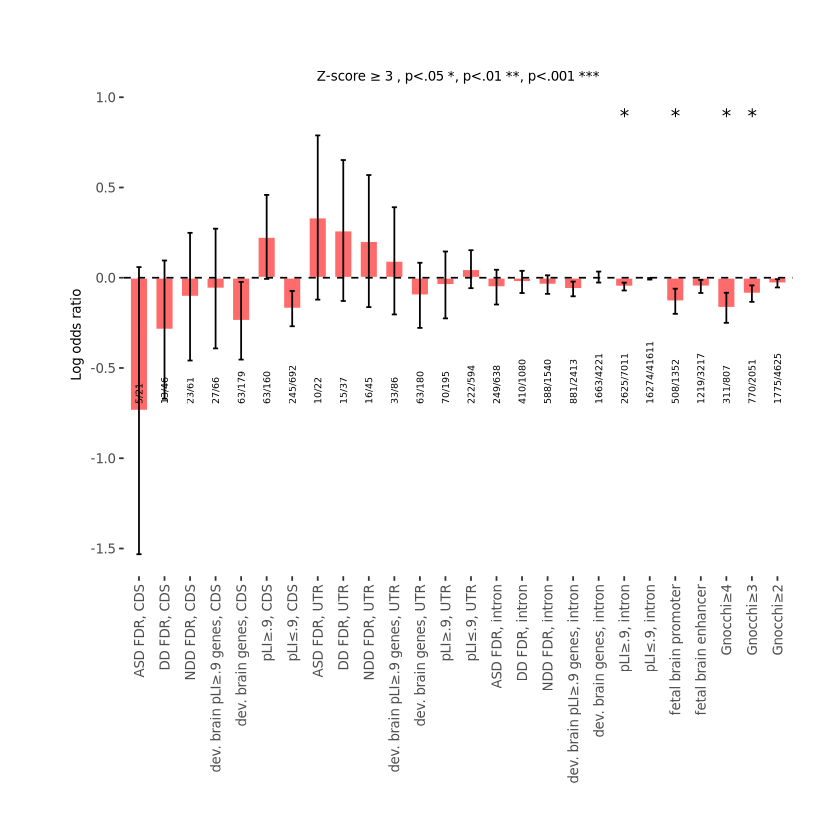

[1] "count_ZS5_FDR_ASD_cds_Q"
[1] "count_ZS5_FDR_DD_cds_Q"
[1] "count_ZS5_FDR_NDD_cds_Q"
[1] "count_ZS5_PLIp9_DEV_BR_GENE_10_cds_Q"
[1] "count_ZS5_DEV_BR_GENE_10_cds_Q"
[1] "count_ZS5_PLIp9_cds_Q"
[1] "count_ZS5_LOWPLI_cds_Q"
[1] "count_ZS5_FDR_ASD_utr_Q"
[1] "count_ZS5_FDR_DD_utr_Q"
[1] "count_ZS5_FDR_NDD_utr_Q"
[1] "count_ZS5_PLIp9_DEV_BR_GENE_10_utr_Q"
[1] "count_ZS5_DEV_BR_GENE_10_utr_Q"
[1] "count_ZS5_PLIp9_utr_Q"
[1] "count_ZS5_LOWPLI_utr_Q"
[1] "count_ZS5_FDR_ASD_intron_Q"
[1] "count_ZS5_FDR_DD_intron_Q"
[1] "count_ZS5_FDR_NDD_intron_Q"
[1] "count_ZS5_PLIp9_DEV_BR_GENE_10_intron_Q"
[1] "count_ZS5_DEV_BR_GENE_10_intron_Q"
[1] "count_ZS5_PLIp9_intron_Q"
[1] "count_ZS5_LOWPLI_intron_Q"
[1] "count_ZS5_FB_PR_Q"
[1] "count_ZS5_FB_ENH_Q"
[1] "count_ZS5_GNOCCHI_4_Q"
[1] "count_ZS5_GNOCCHI_3_Q"
[1] "count_ZS5_GNOCCHI_2_Q"
[1] "ORs:"
 [1] 0.4536059 0.6673068 0.5240273 0.6064328 0.7476914 1.2419895 0.7550647
 [8] 1.6246193 1.6956609 0.9875692 0.5662085 0.5424622 0.6278257 0.9270354
[15] 0.

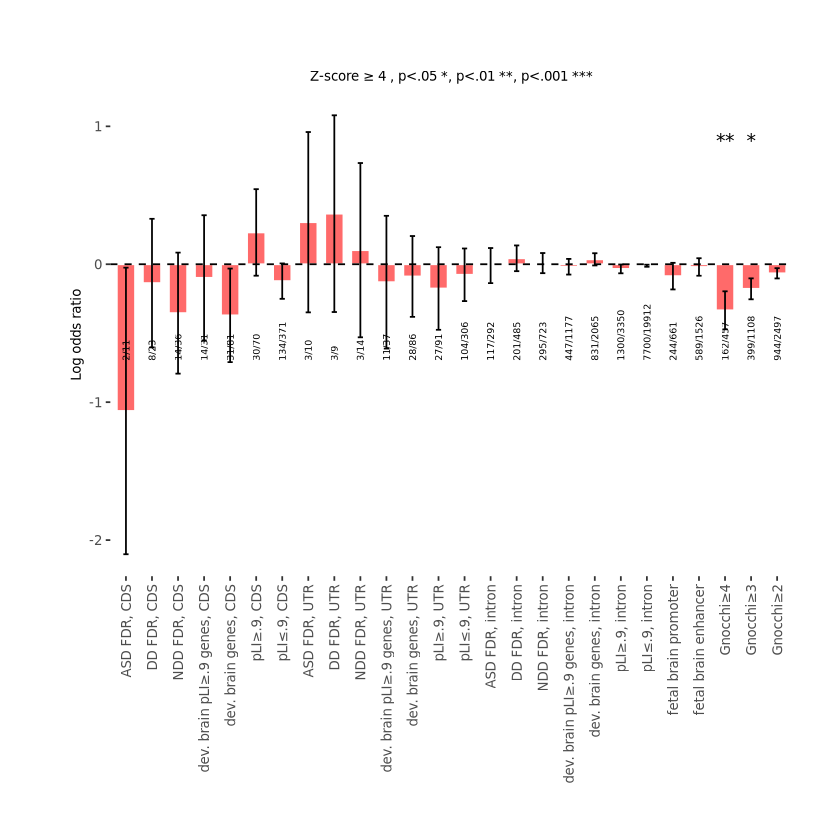

[1] "count_ZS6_FDR_ASD_cds_Q"
[1] "count_ZS6_FDR_DD_cds_Q"
[1] "count_ZS6_FDR_NDD_cds_Q"
[1] "count_ZS6_PLIp9_DEV_BR_GENE_10_cds_Q"
[1] "count_ZS6_DEV_BR_GENE_10_cds_Q"
[1] "count_ZS6_PLIp9_cds_Q"
[1] "count_ZS6_LOWPLI_cds_Q"
[1] "count_ZS6_FDR_ASD_utr_Q"
[1] "count_ZS6_FDR_DD_utr_Q"
[1] "count_ZS6_FDR_NDD_utr_Q"
[1] "count_ZS6_PLIp9_DEV_BR_GENE_10_utr_Q"
[1] "count_ZS6_DEV_BR_GENE_10_utr_Q"
[1] "count_ZS6_PLIp9_utr_Q"
[1] "count_ZS6_LOWPLI_utr_Q"
[1] "count_ZS6_FDR_ASD_intron_Q"
[1] "count_ZS6_FDR_DD_intron_Q"
[1] "count_ZS6_FDR_NDD_intron_Q"
[1] "count_ZS6_PLIp9_DEV_BR_GENE_10_intron_Q"
[1] "count_ZS6_DEV_BR_GENE_10_intron_Q"
[1] "count_ZS6_PLIp9_intron_Q"
[1] "count_ZS6_LOWPLI_intron_Q"
[1] "count_ZS6_FB_PR_Q"
[1] "count_ZS6_FB_ENH_Q"
[1] "count_ZS6_GNOCCHI_4_Q"
[1] "count_ZS6_GNOCCHI_3_Q"
[1] "count_ZS6_GNOCCHI_2_Q"
[1] "ORs:"
 [1] 0.7699981 0.7949285 0.8229833 0.5838020 0.5087874 1.2646384 0.8257419
 [8] 4.8271582 5.2558253 1.2782425 1.0425837 0.2462453 0.8527532 0.8194762
[15] 0.

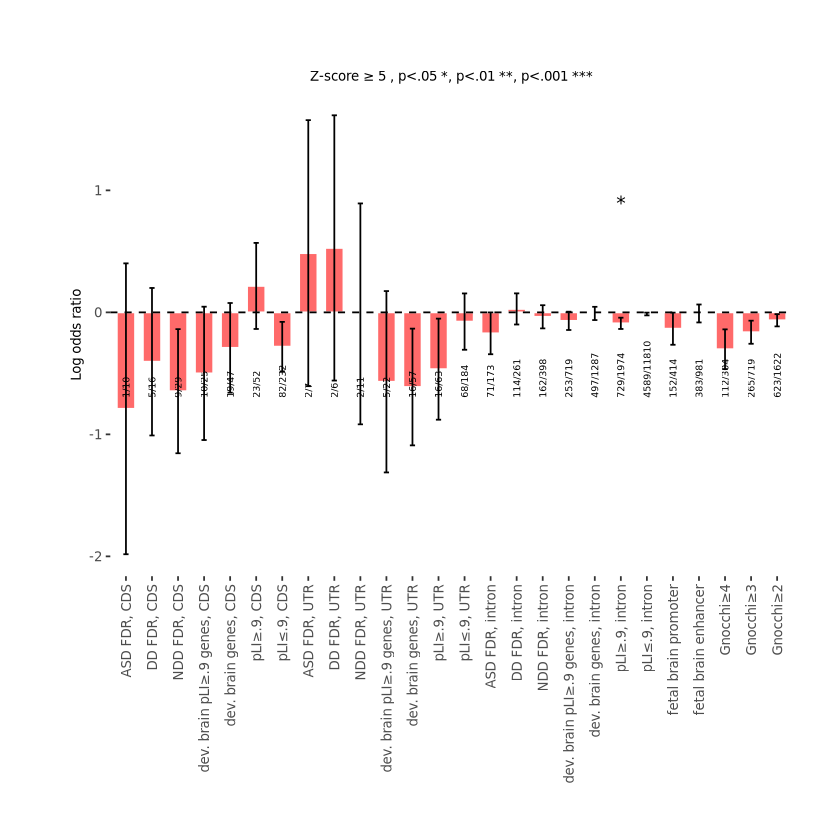

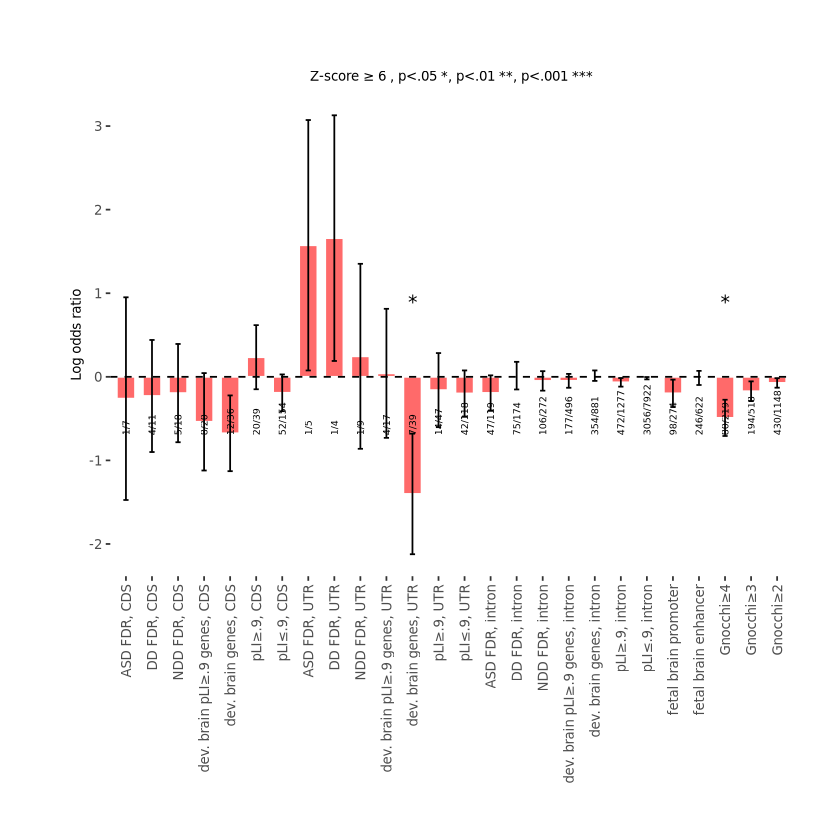

In [12]:
var_suf = '_Q'
#var_suf = ''
pb_zs_thrs = c(3, 4, 5, 6)
platform = '_PB'

for (i_zs in 1:length(pb_zs_thrs)) {
#for (i_zs in 1:1) {
    zs_thr = pb_zs_thrs[i_zs]

    fig_name = paste(dir_fig, "odds_ratio_clogit_lzs", zs_thr, platform, var_suf, ".png", sep='')

    null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE +
                              PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')

    ORs = c()
    ORs_plus = c()
    ORs_minus = c()
    log_ORs = c()
    log_ORs_plus = c()
    log_ORs_minus = c()
    pvals = c()
    ano_pvals = c()
    sum_cases = c()
    sum_controls = c()
    #for (ft in fts[c(1:1)]) {
    for (ft in fts) {
        var = paste('count_ZS', zs_thr, '_', ft, var_suf, sep="")
        #var = paste('count_ZS', zs_thr, '_', ft, '_Q', sep="")
        print(var)
    
        sum_case = sum(df_main[df_main$Phenotype==1,][,var])
        sum_control = sum(df_main[df_main$Phenotype==0,][,var])
        sum_cases = c(sum_cases, sum_case)
        sum_controls = c(sum_controls, sum_control)
    
        #model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + Platform + 
        #                                 PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
        model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE +
                                         PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
        
        null_model <- clogit(null_formula, data = df_main)
        #print(summary(null_model))
    
        clogit_model <- clogit(model_formula, data = df_main)
        #print(summary(clogit_model))
        #print(str(summary(clogit_model)))
        OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
        OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
        OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
        log_OR = summary(clogit_model)$coefficients[var, 'coef']
        log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
        log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
        pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
        ORs = c(ORs, OR)
        ORs_plus = c(ORs_plus, OR_plus)
        ORs_minus = c(ORs_minus, OR_minus)
        log_ORs = c(log_ORs, log_OR)
        log_ORs_plus = c(log_ORs_plus, log_OR_plus)
        log_ORs_minus = c(log_ORs_minus, log_OR_minus)
        pvals = c(pvals, pval)
        
        ano <- anova(null_model, clogit_model, test='Chisq')
        ano_pval = ano$"Pr(>|Chi|)"[2]
        ano_pvals = c(ano_pvals, ano_pval)
        #print(str(summary(ano)))
        #print(ano)
        #print(str(ano))
    }
    
    sum_case_controls = paste(as.character(sum_cases), as.character(sum_controls), sep='/')
    
    print('ORs:')
    print(ORs)
    print('ORs_plus:')
    print(ORs_plus)
    print('ORs_minus:')
    print(ORs_minus)
    print('log_ORs:')
    print(log_ORs)
    print('log_ORs_plus:')
    print(log_ORs_plus)
    print('log_ORs_minus:')
    print(log_ORs_minus)
    print('pvals:')
    print(pvals)
    print('ano_pvals:')
    print(ano_pvals)
    print('sum_cases:')
    print(sum_cases)
    print('sum_controls:')
    print(sum_controls)
    print('sum_case_controls:')
    print(sum_case_controls)


    my_data = data.frame('ORs' = ORs, 'ORs_plus' = ORs_plus, 'ORs_minus' = ORs_minus,  
                         'log_ORs' = log_ORs, 'log_ORs_plus' = log_ORs_plus, 'log_ORs_minus' = log_ORs_minus,  
                         'fts' = fts, 'fts_labels' = fts_labels, 'clogit_pval' = pvals, 'ano_pval' = ano_pvals, 'sum_case_con' = sum_case_controls)
    my_data$fts <- factor(my_data$fts, levels = my_data$fts)
    my_data <- my_data[!is.infinite(my_data$ORs_plus),]
    anova_sig <- sapply(my_data$ano_pval, get_pval_char)
    print(anova_sig)
    my_data$ano_sig = anova_sig

    print(fig_name)
    y_sig = .9
    size_txt = 8
    size_sig = 4
    label_pos = -.7
    
    base <- ggplot(my_data, aes(x = fts, y = log_ORs, label = sum_case_con)) +
      geom_bar(stat = "identity", fill = "indianred1", color = "white", width = 0.7) +
      geom_errorbar(aes(ymin = log_ORs_minus, ymax = log_ORs_plus), width = 0.2) +
      geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
      labs(y = "Log odds ratio", title = paste('Z-score ≥', zs_thr, ', p<.05 *, p<.01 **, p<.001 ***')) +
      theme(axis.text=element_text(size=size_txt),
            axis.text.x = element_text(angle = 90, vjust = .5, hjust=1, size=size_txt),
            axis.title.x = element_blank(),
            axis.title.y = element_text(size=size_txt),
            plot.margin = margin(t = 1.5, l = 1.5, r = 1, b = 1, "cm"),
            panel.background = element_blank(),
            plot.title = element_text(hjust = 0.5, size=size_txt)
           ) +
      scale_x_discrete(labels=my_data$fts_labels) +
      annotate("text", x=1:dim(my_data)[1], y=y_sig, label= anova_sig, size=size_sig) +
      geom_text(aes(x = fts, y = label_pos, label = sum_case_con), angle=90, hjust=0, size=2)

    print(base)
    
    ggsave(fig_name, width = 5, height = 5)
    
}